In [2]:
import os
import torch
import utils
import loss
import sampling as sample
from model import Diffusion_Model_2D
import train2D 
from train2D import train_2D, run_saved_model_2D
from datasets import gaussian_clusters, ring, swiss_roll, waves

# # if running on different cluster
# os.environ["CUDA_VISIBLE_DEVICES"] = "1" 
# os.environ["WORLD_SIZE"] = "1"
# print(torch.__version__)  
# print(torch.cuda.is_available())  
# print(torch.cuda.device_count())
# print(torch.cuda.current_device())
# print(os.environ.get("CUDA_VISIBLE_DEVICES")) 

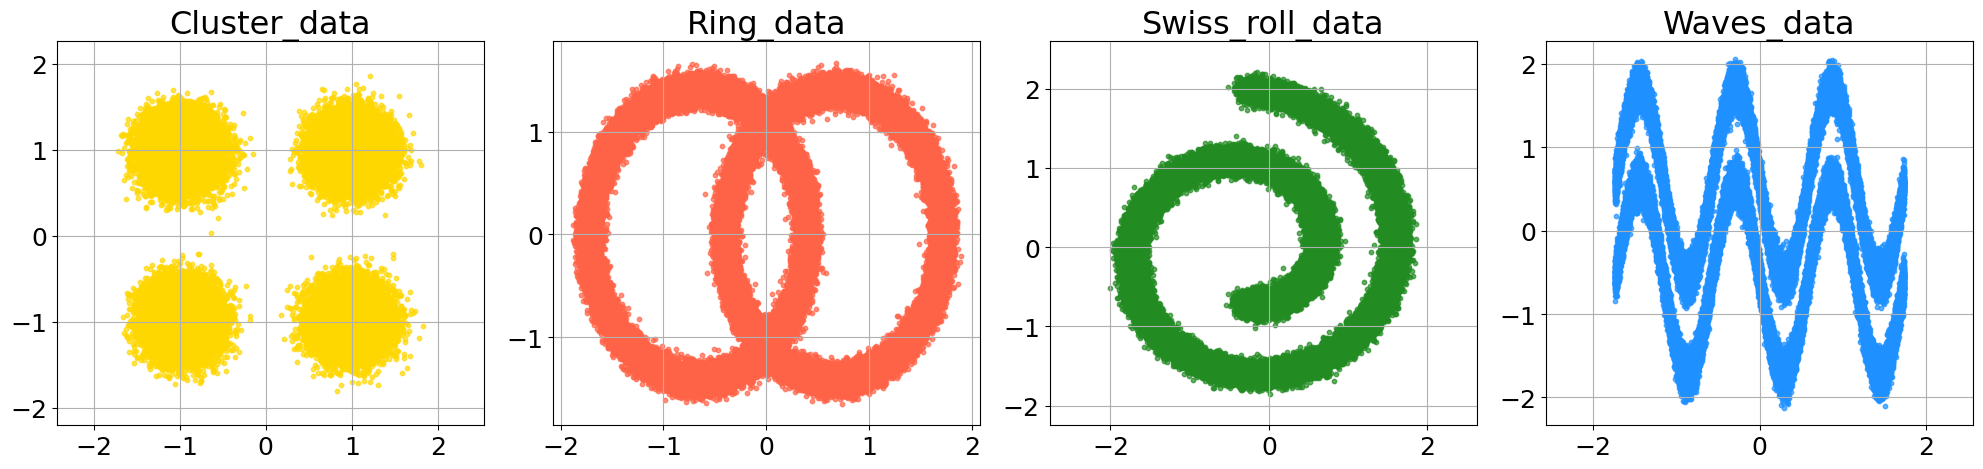

In [3]:
## load the datasets
Cluster_data = gaussian_clusters.generate_gaussian_clusters()
Ring_data = ring.generate_intersecting_rings()
Swiss_roll_data = swiss_roll.generate_swiss_roll()
Waves_data = waves.generate_parallel_waves()
data_dict = {
    "Cluster_data": Cluster_data,
    "Ring_data": Ring_data,
    "Swiss_roll_data": Swiss_roll_data,
    "Waves_data": Waves_data
}

# Find Entropy
# utils.compare_datasets_entropy(data_dict, component_values=[5,10,100,200])
# for key, data in data_dict.items():
#     data_entropy = utils.calculate_entropy(data)
#     print(f"{key}:\n Entropy: {data_entropy}\n")

# Visualize the datasets
utils.plot_all_datasets(data_dict, "datasets/all_data.png", save=True)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


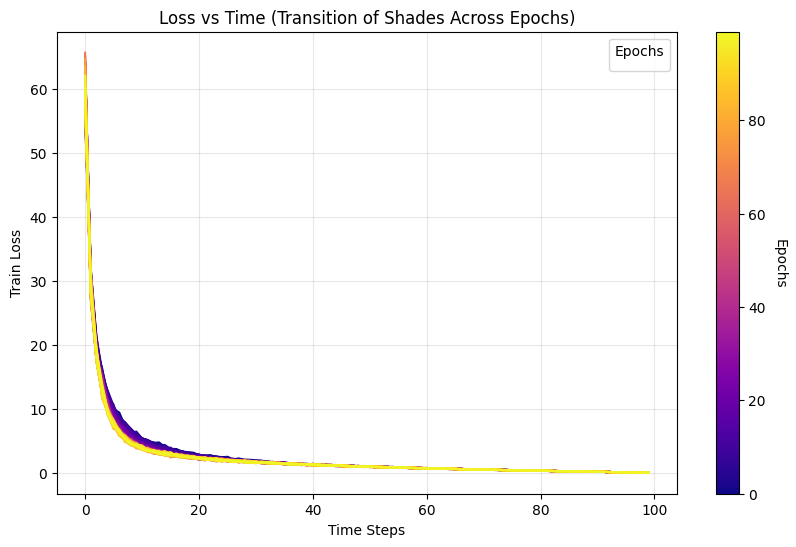

In [4]:
## Graphs of loss vs time per epoch
data_type = "Ring_data"
loss_formulation = loss.diffusion_loss_v
path = f'saved_data/2Dim/ELBO/{loss_formulation.__name__}_training_results'
utils.plot_loss_transition(path, data_type, epoch_key='loss_vs_time_per_epoch')

100%|██████████| 100/100 [04:55<00:00,  2.95s/it]


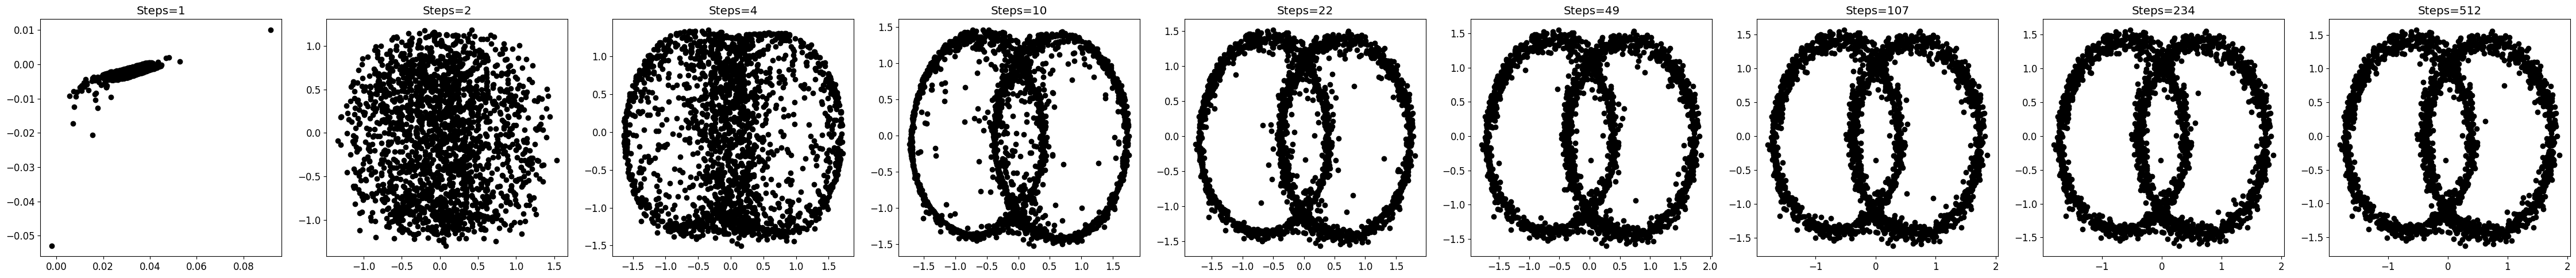

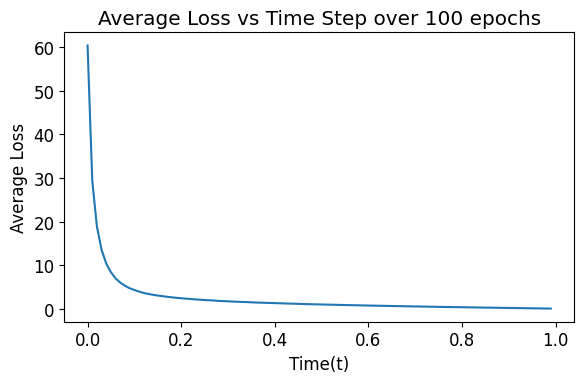

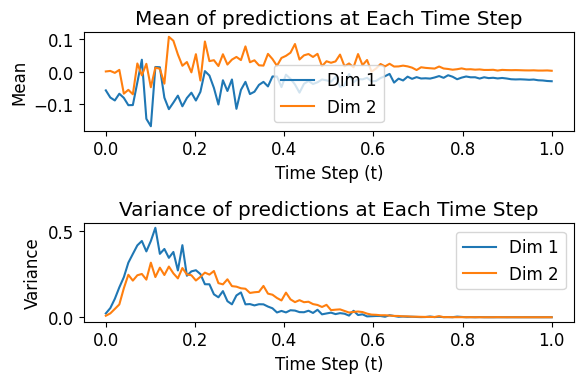

In [3]:
# Run on Single data

train_data, test_data = utils.split_train_test(Ring_data)
loss_formulation = loss.diffusion_loss_v
data_type = 'test'
scale_type = 'ELBO'
t_embed = False
sampling = sample.sampling_v
train_loss, test_loss, loss_vs_time, loss_vs_time_per_epoch = train_2D(train_data, 
                                                                        test_data, 
                                                                        data_type,
                                                                        scale_type, 
                                                                        loss_formulation, 
                                                                        t_embed = t_embed, 
                                                                        sampling=sampling, 
                                                                        plot_loss_by_time=True, 
                                                                        plot_samples=True, 
                                                                        plot_mean_var_pred=True, 
                                                                        save_params = False)


In [ ]:
# Run on a all dataset
data_type = [Cluster_data, Ring_data, Swiss_roll_data, Waves_data]
for i,data in enumerate(data_type):
    train_data, test_data = utils.split_train_test(data)
    loss_formulation = loss.diffusion_loss_x
    data_type = list(data_dict.keys())[i]
    scale_type = 'Weighted'
    t_embed = False
    sampling = sample.sampling_x
    train_loss, test_loss, loss_vs_time, loss_vs_time_per_epoch = train_2D(train_data, 
                                                                            test_data, 
                                                                            data_type,
                                                                            scale_type, 
                                                                            loss_formulation, 
                                                                            t_embed = t_embed, 
                                                                            sampling=sampling, 
                                                                            plot_loss_by_time=True, 
                                                                            plot_samples=True, 
                                                                            plot_mean_var_pred=True, 
                                                                            save_params = False)


diffusion_loss_x


100%|██████████| 100/100 [04:53<00:00,  2.93s/it]


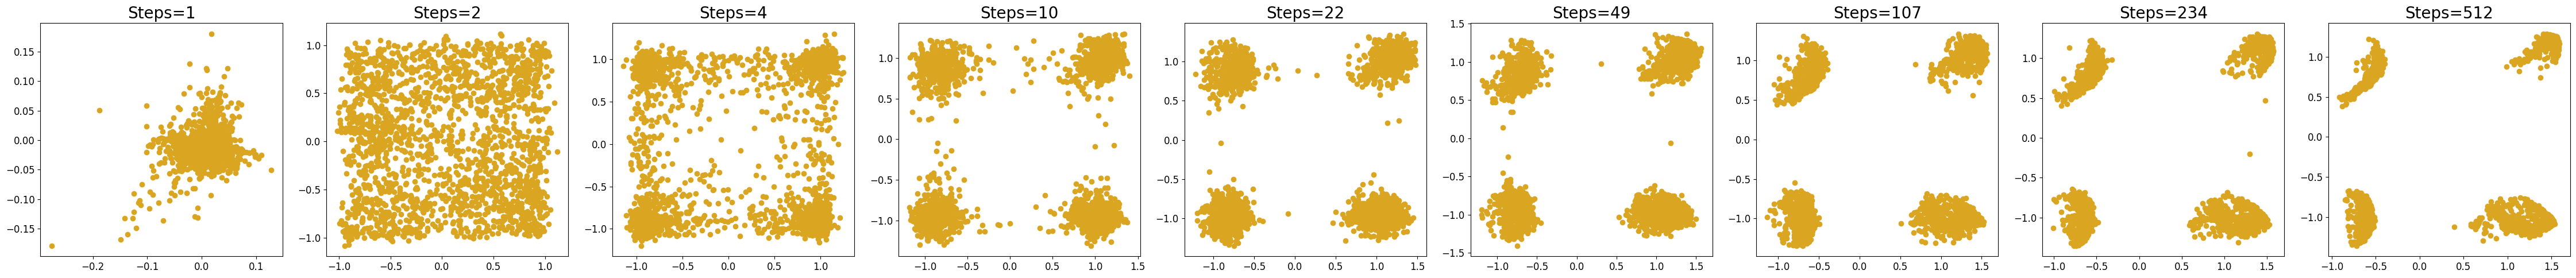

diffusion_loss_epsilon


100%|██████████| 100/100 [04:52<00:00,  2.92s/it]


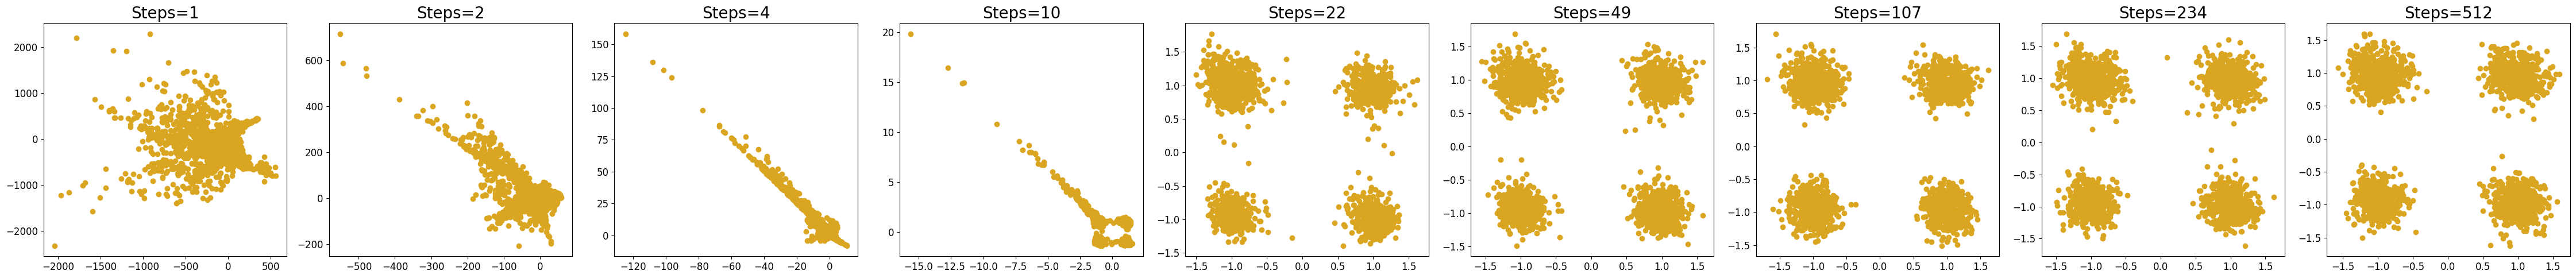

diffusion_loss_v


100%|██████████| 100/100 [04:56<00:00,  2.97s/it]


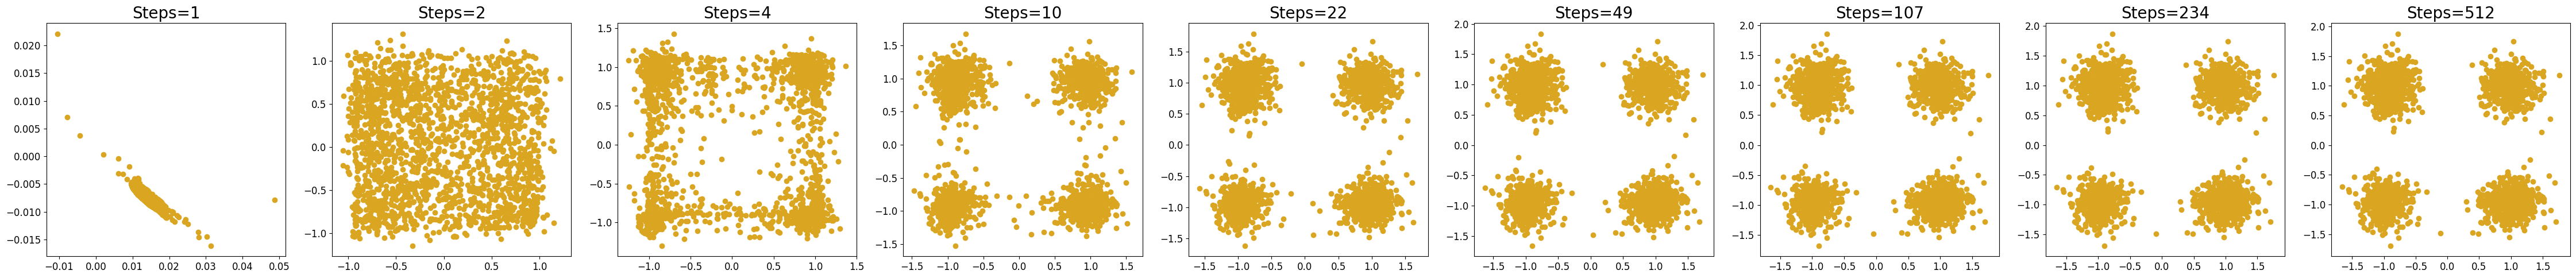

diffusion_loss_score


100%|██████████| 100/100 [04:54<00:00,  2.94s/it]


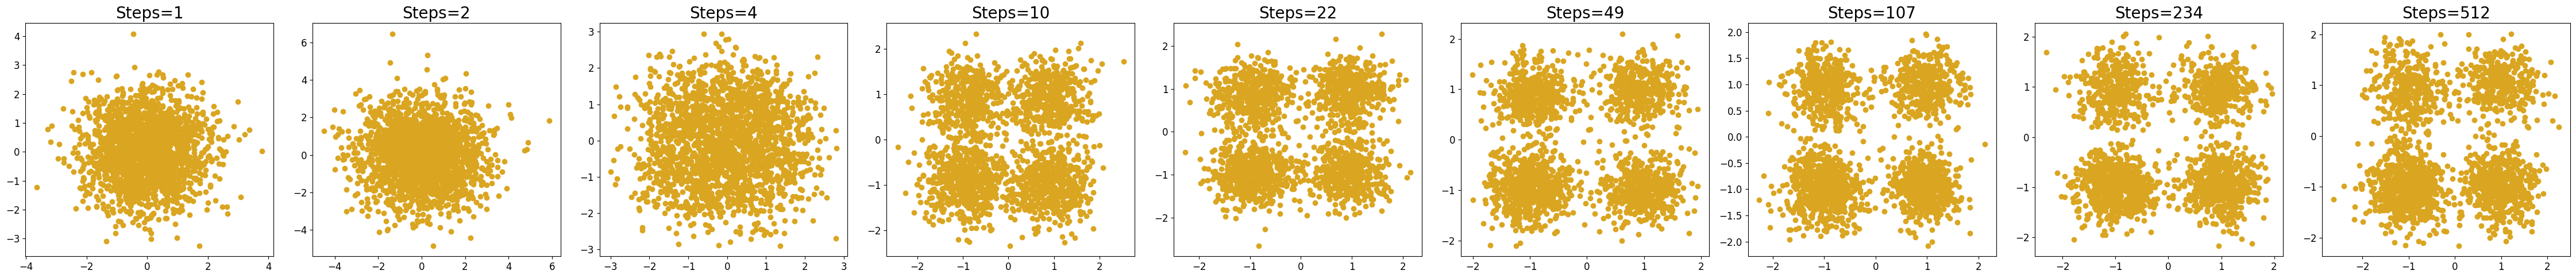

In [4]:
# Run for all Losses
loss_type = [loss.diffusion_loss_x, loss.diffusion_loss_epsilon, loss.diffusion_loss_v, loss.diffusion_loss_score]
sample_type = [sample.sampling_x, sample.sampling_epsilon, sample.sampling_v, sample.sampling_score]
data = Cluster_data
for i,loss_used in enumerate(loss_type):
    print(loss_used.__name__)
    train_data, test_data = utils.split_train_test(data)
    loss_formulation = loss_used
    data_type = 'Cluster_data'
    scale_type = 'Weighted'
    t_embed = False
    sampling = sample_type[i]
    train_loss, test_loss, loss_vs_time, loss_vs_time_per_epoch = train_2D(train_data, 
                                                                            test_data, 
                                                                            data_type,
                                                                            scale_type, 
                                                                            loss_formulation, 
                                                                            t_embed = t_embed, 
                                                                            sampling=sampling, 
                                                                            plot_loss_by_time=False, 
                                                                            plot_samples=True, 
                                                                            plot_mean_var_pred=False, 
                                                                            save_params = True)


In [5]:
# Run on a dataset
train_data, test_data = utils.split_train_test(swiss_roll_data, random_seed=42)
loss_formulation = loss.diffusion_loss_score
data_type = 'Ring_data'
scale_type = 'no scaling'
t_embed = 'False'
#sampling = sample.sampling_v
train_loss, test_loss, loss_vs_time, loss_vs_time_per_epoch = train_2D(train_data, 
                                                                        test_data, 
                                                                        data_type,
                                                                        scale_type, 
                                                                        loss_formulation)
                                                                        


100%|██████████| 5/5 [00:14<00:00,  2.93s/it]


In [4]:
#utils.plot_noise_at_different_levels(data_dict)
# utils.find_corruption_rate_wsd(data_dict, num_time_steps=100)

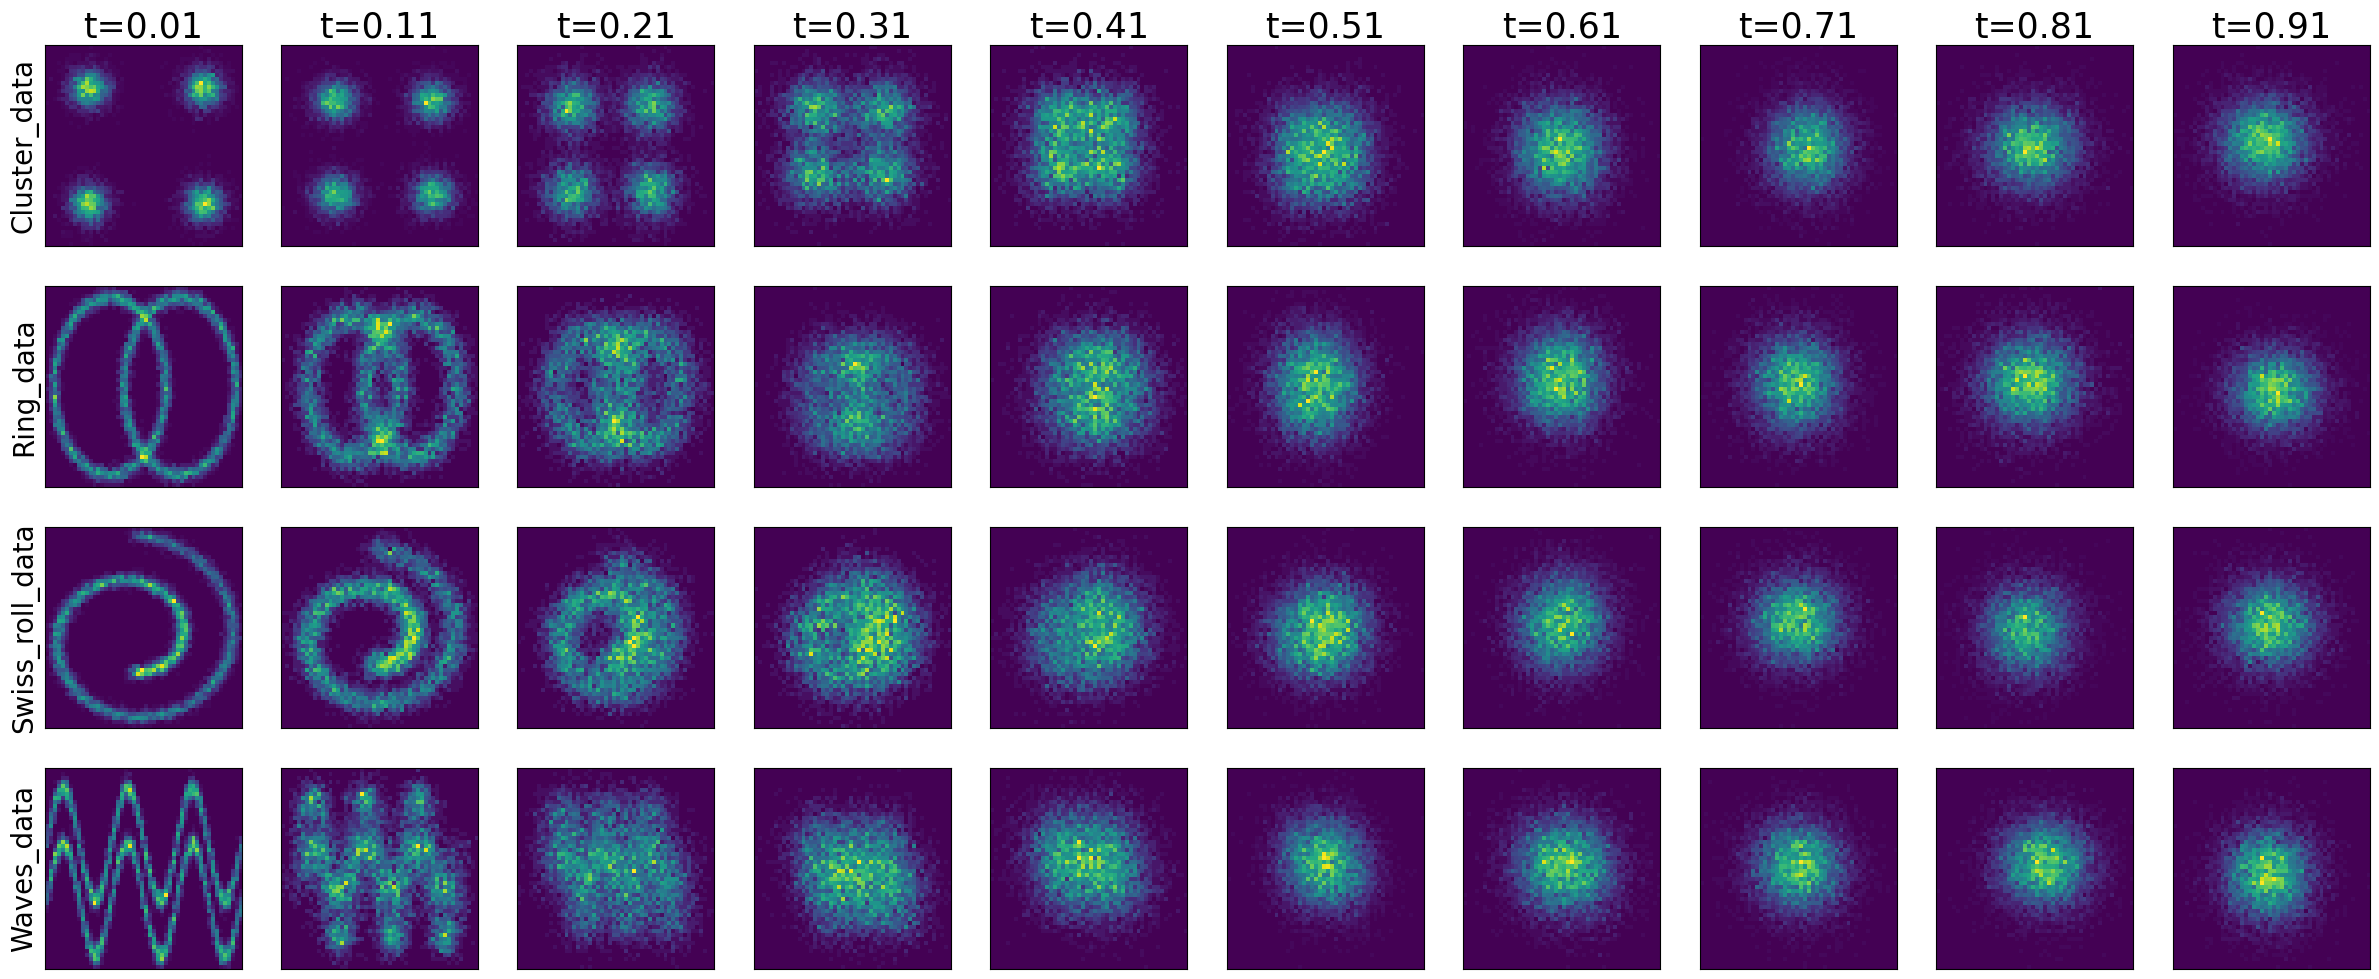

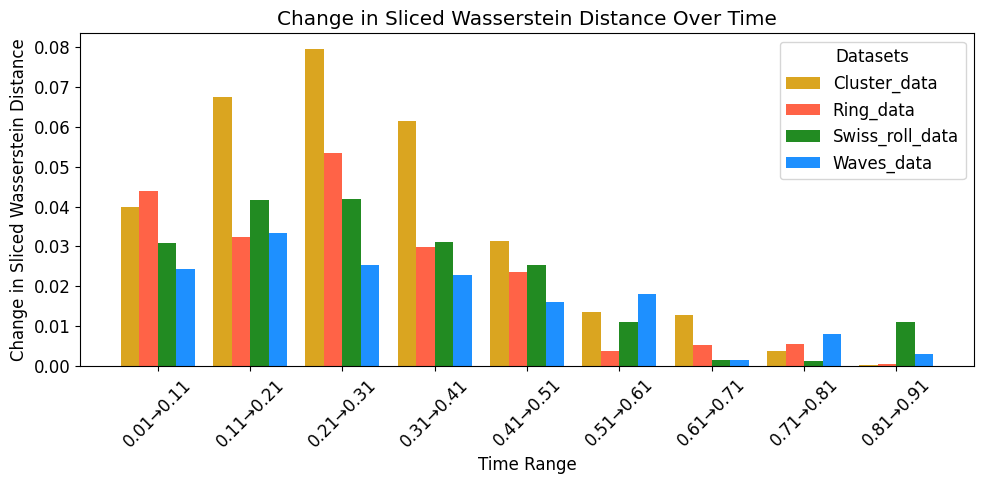

In [3]:
dist = utils.compute_sliced_wasserstein(data_dict, n_projections=100, plot=True)

In [8]:
import numpy as np
distdistance_changes = {key: abs(np.diff(distances)) for key, distances in dist.items()}


In [10]:
distdistance_changes

{'Cluster_data': array([0.07226984, 0.06372783, 0.05920083, 0.05279933, 0.03969241,
        0.01395926, 0.00700416, 0.00048788, 0.00352027]),
 'Ring_data': array([0.03424277, 0.04977454, 0.03392734, 0.03722747, 0.03078371,
        0.01022373, 0.00592016, 0.00820351, 0.02047429]),
 'Swiss_roll_data': array([0.03693196, 0.03767479, 0.04312871, 0.03722045, 0.0152536 ,
        0.01358226, 0.0083895 , 0.00335394, 0.00364203]),
 'Waves_data': array([0.03395053, 0.01963323, 0.02778864, 0.02569428, 0.01280062,
        0.01495349, 0.01128637, 0.00598101, 0.01290357])}

100%|██████████| 100/100 [05:05<00:00,  3.06s/it]


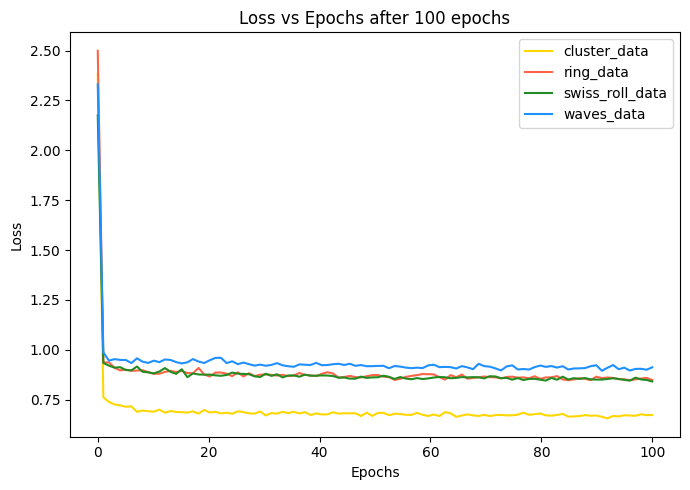

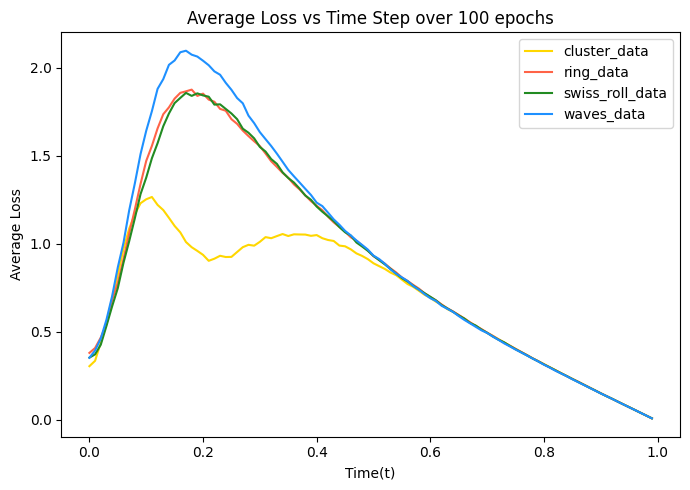

100%|██████████| 100/100 [05:06<00:00,  3.06s/it]


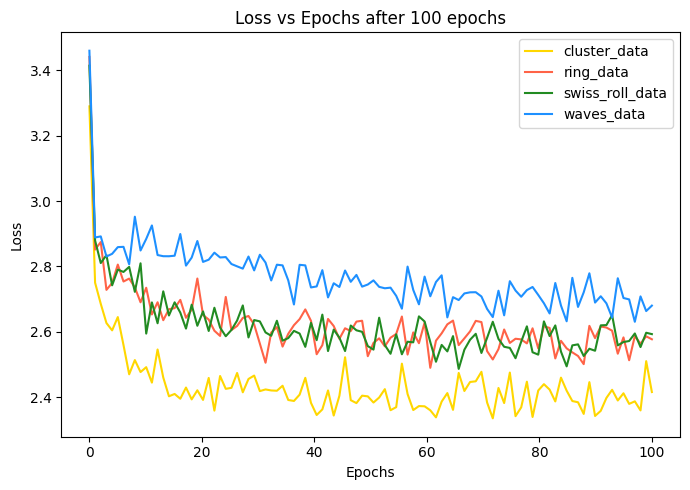

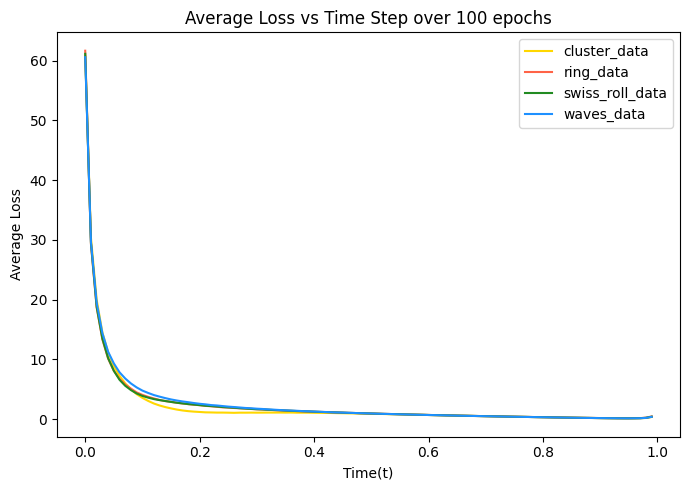

100%|██████████| 100/100 [05:07<00:00,  3.07s/it]


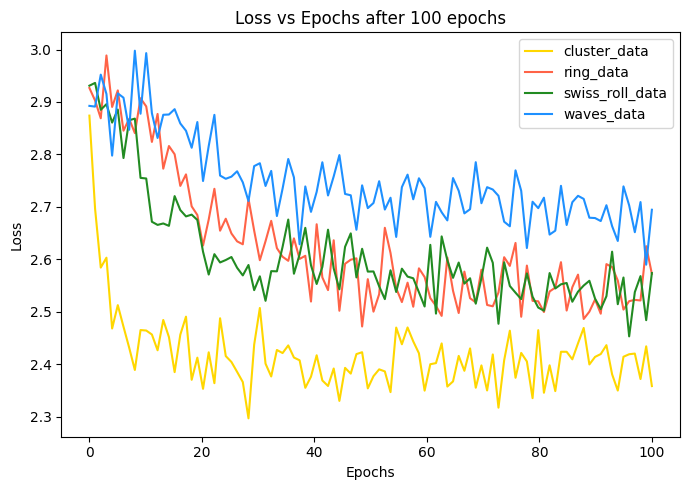

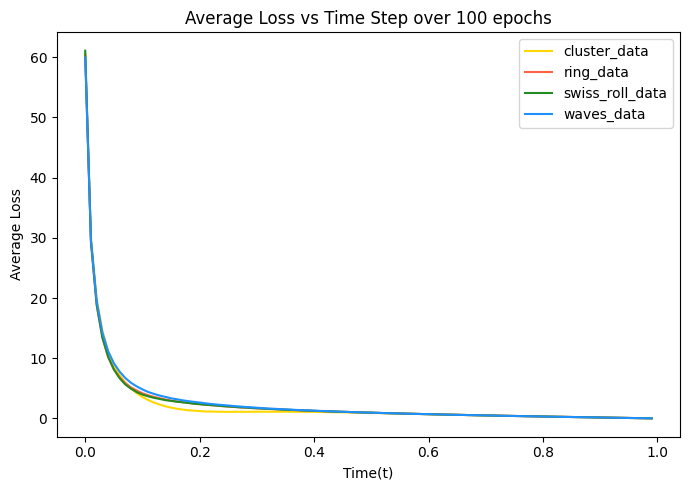

100%|██████████| 100/100 [05:08<00:00,  3.09s/it]


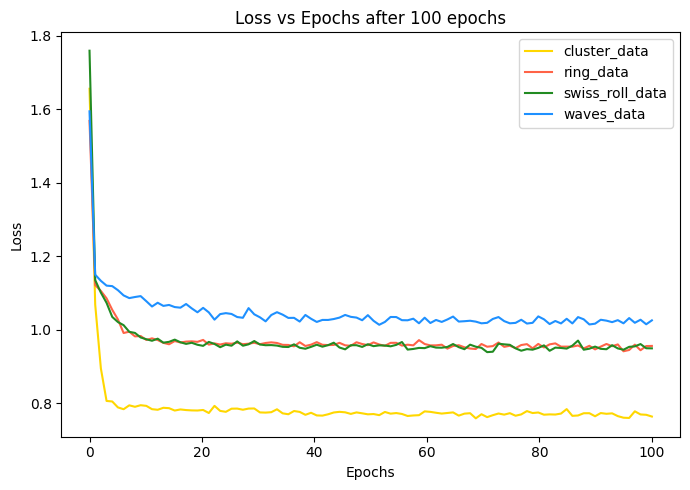

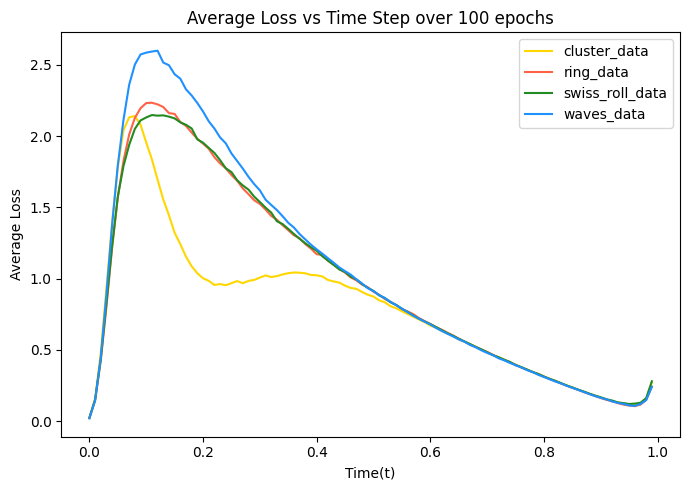

In [3]:
lf = [loss.diffusion_loss_x, loss.diffusion_loss_epsilon, loss.diffusion_loss_v, loss.diffusion_loss_score]

# loss vs Epochs Graphs and Loss vs T for all 2D datasets
for loss_formulation in lf:  
    scale_type = 'ELBO'
    train2D.loss_vs_epochs_and_time_graphs(loss_formulation, data_dict, scale_type, save_data_dict = True)

In [1]:
# Run Saved Model
# run_saved_model(train_data,loss_formulation, data_type, sampling)

100%|██████████| 100/100 [00:14<00:00,  6.89it/s]


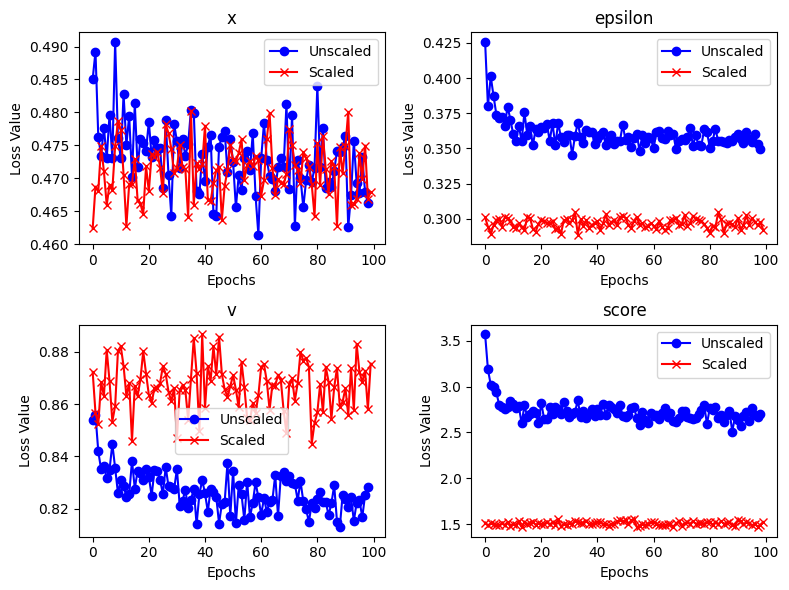

In [ ]:
## Run for unscaled loss, scaled loss and compare

# Unscaled Loss
losses = [loss.diffusion_loss_x, loss.diffusion_loss_epsilon, loss.diffusion_loss_v, loss.diffusion_loss_score]
train_data, test_data = utils.split_train_test(Cluster_data)
scale_type = 'no_scaling'
data_type = 'Cluster_data'
unscaled_test_losses = {}
for loss_formulation in losses:
    saved_data_path = f'saved_data/2Dim/Weighted/Execution_1/{loss_formulation.__name__}_training_results'
    data = utils.load_data(saved_data_path)
    test_loss = data['Cluster_data']['test_loss']
    key =loss_formulation.__name__
    unscaled_test_losses[key] = test_loss[1:]

# Training on x loss and saving the model
loss_formulation = loss.diffusion_loss_x
data_type = 'cluster'
_, _, _, _ = train_2D(train_data, test_data, data_type, scale_type, loss_formulation, save_params = True)

# Find all the scaled loss using saved params of the model
scaled_test_losses = train2D.evaluate_on_scaled_loss(test_data, loss_formulation, data_type)
utils.plot_scaled_vs_unscaled(unscaled_test_losses, scaled_test_losses)


In [1]:
### Plot ELBO vs Unscaled loss
# data_type = 'Cluster'
# loss_formulation = loss.diffusion_loss_v
# Weighted_train_loss, Weighted_test_loss, X_Equivalent_train_loss, X_Equivalent_test_loss = train2D.loss_scaled_unscaled(loss_formulation, cluster_data, data_type)

100%|██████████| 100/100 [04:47<00:00,  2.88s/it]


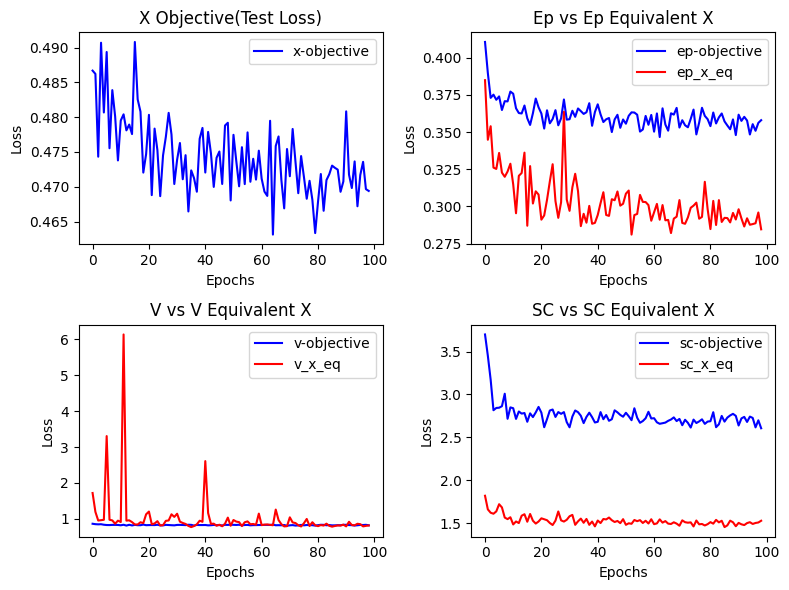

In [ ]:
## Compare weighted objectives to equivalent x objectives
data = Cluster_data
data_type = 'Cluster'
Weighted_train_loss, Weighted_test_loss, X_Equivalent_train_loss, X_Equivalent_test_loss = train2D.Compare_Weighted_losses(data, data_type)

100%|██████████| 100/100 [04:48<00:00,  2.89s/it]


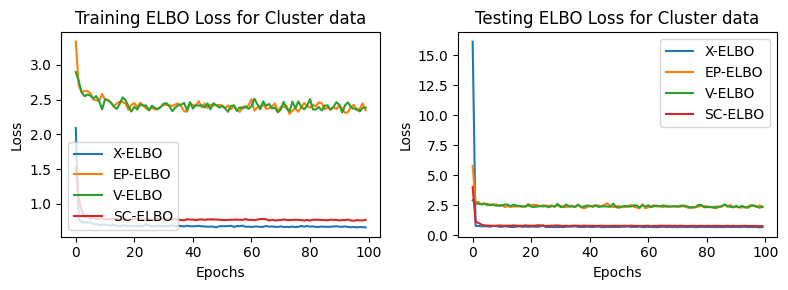

In [3]:
data = cluster_data
data_type = 'Cluster'
train2D.compare_weighted_losses(data, data_type)

100%|██████████| 5/5 [00:14<00:00,  2.84s/it]


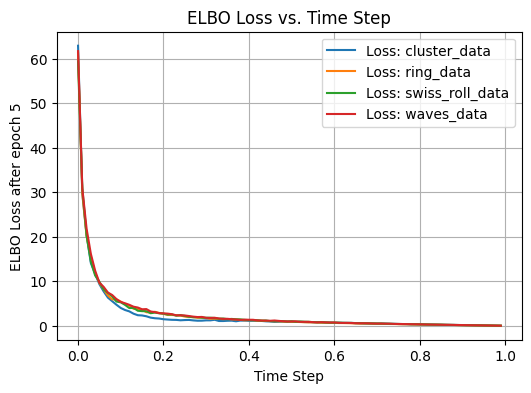

In [4]:
# plot elbo vs time
loss_formulation = loss.diffusion_loss_v
scale_type = 'ELBO'
train2D.loss_vs_time(loss_formulation, scale_type, data_dict)

100


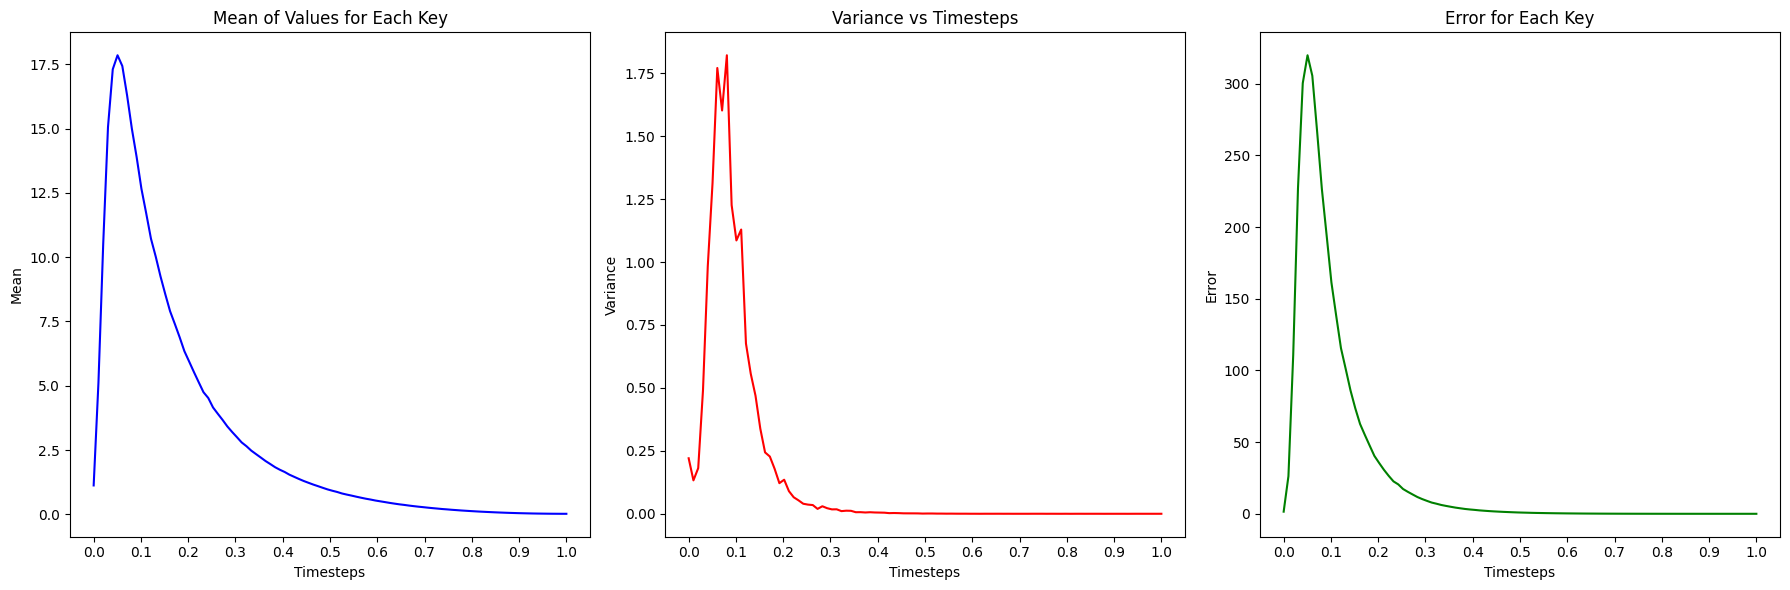

Total Error across all time steps: 3144.0620212248014


In [33]:
import matplotlib.pyplot as plt
import numpy as np

# Function to find the variance of loss at each time step
loss_formulation = loss.diffusion_loss_score
data_type = "Swiss_roll_data"
path = f"saved_data/2Dim/Weighted/Execution_1/{loss_formulation.__name__}_training_results"
results = utils.load_data(path)
lt_per_epoch = results[data_type]['loss_vs_time_per_epoch']
print(len(lt_per_epoch))

master_dict = {}
for di in lt_per_epoch:
   for key, value in di.items():
      master_dict.setdefault(key, []).append(value)

# Calculating mean and variance for each key
keys = list(master_dict.keys())
means = [np.mean(values) for values in master_dict.values()]
variances = [np.var(values) for values in master_dict.values()]

# Generate x-axis values
timesteps = np.linspace(0, 1, len(keys))

# Plotting mean, variance, and error in separate graphs
plt.figure(figsize=(18, 6))

# Plotting means
plt.subplot(1, 3, 1)  # 1 row, 3 columns, first subplot
plt.plot(timesteps, means, label="Mean", color='blue')
plt.xlabel('Timesteps')
plt.ylabel('Mean')
plt.title('Mean of Values for Each Key')
plt.xticks(ticks=np.linspace(0, 1, 11))  # Set x-axis ticks from 0 to 1 in steps of 0.1

# Plotting variances
plt.subplot(1, 3, 2)  # 1 row, 3 columns, second subplot
plt.plot(timesteps, variances, label="Variance", color='red')
plt.xlabel('Timesteps')
plt.ylabel('Variance')
plt.title('Variance vs Timesteps')
plt.xticks(ticks=np.linspace(0, 1, 11))  # Set x-axis ticks from 0 to 1 in steps of 0.1

# Calculating bias, variance, and error for each key
true_mean = 0
errors = {}
for key in master_dict:
    mean = np.mean(master_dict[key])  # Mean for the key
    variance = np.var(master_dict[key])  # Variance for the key
    bias = mean - true_mean  # Bias (mean - true mean)
    error = (bias ** 2) + variance  # Error calculation
    errors[key] = error

# Plotting errors
plt.subplot(1, 3, 3)  # 1 row, 3 columns, third subplot
plt.plot(timesteps, list(errors.values()), label="Error", color='green')
plt.xlabel('Timesteps')
plt.ylabel('Error')
plt.title('Error for Each Key')
plt.xticks(ticks=np.linspace(0, 1, 11))  # Set x-axis ticks from 0 to 1 in steps of 0.1

# Adjusting layout and showing the plot
plt.tight_layout()
plt.show()

total_error = sum(errors.values())
print(f"Total Error across all time steps: {total_error}")


In [ ]:
# Function to find the variance of loss at each time step
loss_formulation = loss.diffusion_loss_score
data_type = "Swiss_roll_data"
path = f"saved_data/2Dim/Weighted/Execution_1/{loss_formulation.__name__}_training_results"
results = utils.load_data(path)
lt_per_epoch = results[data_type]['loss_vs_time_per_epoch']
print(len(lt_per_epoch))

master_dict = {}
for di in lt_per_epoch:
   for key, value in di.items():
      master_dict.setdefault(key, []).append(value)

# Calculating mean and variance for each key
keys = list(master_dict.keys())
means = [np.mean(values) for values in master_dict.values()]
variances = [np.var(values) for values in master_dict.values()]

# Generate x-axis values
timesteps = np.linspace(0, 1, len(keys))

# Plotting mean, variance, and error in separate graphs
plt.figure(figsize=(18, 6))

# Plotting means
plt.subplot(1, 3, 1)  # 1 row, 3 columns, first subplot
plt.plot(timesteps, means, label="Mean", color='blue')
plt.xlabel('Timesteps')
plt.ylabel('Mean')
plt.title('Mean of Values for Each Key')
plt.xticks(ticks=np.linspace(0, 1, 11))  

100

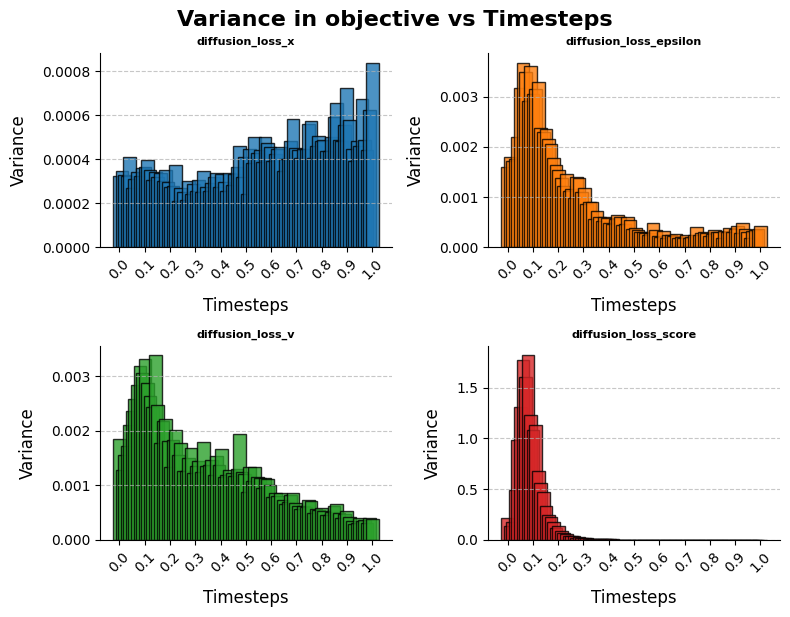

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define loss formulations
loss_formulations = [
    loss.diffusion_loss_x,
    loss.diffusion_loss_epsilon,
    loss.diffusion_loss_v,
    loss.diffusion_loss_score,
]

data_type = "Swiss_roll_data"
base_path = "saved_data/2Dim/Weighted/Execution_1"

# Define a color palette for each plot
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']  # Distinct colors for each subplot

# Create subplots for each loss formulation
fig, axes = plt.subplots(2, 2, figsize=(8, 6))  # 2x2 grid of subplots
axes = axes.flatten()

for idx, loss_formulation in enumerate(loss_formulations):
    path = f"{base_path}/{loss_formulation.__name__}_training_results"
    results = utils.load_data(path)
    lt_per_epoch = results[data_type]['loss_vs_time_per_epoch']
    
    master_dict = {}
    for di in lt_per_epoch:
        for key, value in di.items():
            master_dict.setdefault(key, []).append(value)
    
    # Calculate variance
    keys = list(master_dict.keys())
    variances = [np.var(values) for values in master_dict.values()]
    timesteps = np.linspace(0, 1, len(keys))

    # Plotting variance in the current subplot as bar plot
    ax = axes[idx]
    ax.bar(
        timesteps, 
        variances, 
        color=colors[idx], 
        edgecolor='black', 
        alpha=0.8, 
        width=0.05
    )
    ax.set_xlabel('Timesteps', fontsize=12, labelpad=10)
    ax.set_ylabel('Variance', fontsize=12, labelpad=10)
    ax.set_title(f"{loss_formulation.__name__}", fontsize=8, weight='bold')
    ax.set_xticks(np.linspace(0, 1, 11))  
    ax.set_xticklabels([f"{t:.1f}" for t in np.linspace(0, 1, 11)], rotation=45)
    ax.grid(axis='y', linestyle='--', alpha=0.7)  
    ax.spines['top'].set_visible(False)  
    ax.spines['right'].set_visible(False)  

# Adjust layout for better spacing
plt.tight_layout()

# Add an overall title for the entire figure
fig.suptitle('Variance in objective vs Timesteps', fontsize=16, weight='bold', y=1.02)

# Show the plots
plt.show()


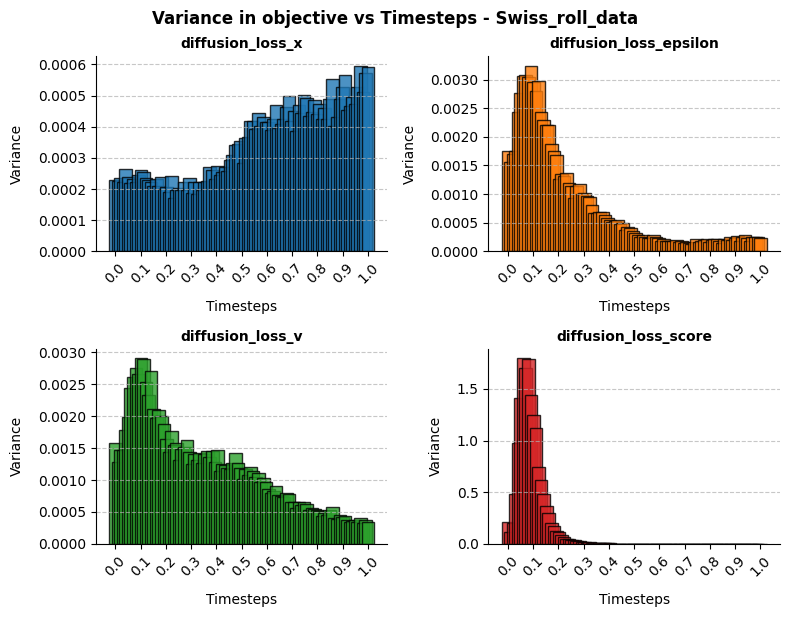

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
loss_formulations = [
    loss.diffusion_loss_x,
    loss.diffusion_loss_epsilon,
    loss.diffusion_loss_v,
    loss.diffusion_loss_score,
]

data_type = "Swiss_roll_data"
base_paths = [
    "saved_data/2Dim/Weighted/Execution_1",
    "saved_data/2Dim/Weighted/Execution_2",
    "saved_data/2Dim/Weighted/Execution_3",
]

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
fig, axes = plt.subplots(2, 2, figsize=(8, 6))
axes = axes.flatten()

for idx, loss_formulation in enumerate(loss_formulations):
    combined_variances = {}

    for base_path in base_paths:
        path = f"{base_path}/{loss_formulation.__name__}_training_results"
        results = utils.load_data(path)
        lt_per_epoch = results[data_type]['loss_vs_time_per_epoch']
        
        master_dict = {}
        for di in lt_per_epoch:
            for key, value in di.items():
                master_dict.setdefault(key, []).append(value)
        
        for key, values in master_dict.items():
            variance = np.var(values)
            combined_variances.setdefault(key, []).append(variance)

    keys = list(combined_variances.keys())
    mean_variances = [np.mean(combined_variances[key]) for key in keys]
    timesteps = np.linspace(0, 1, len(keys))
    ax = axes[idx]
    ax.bar(
        timesteps, 
        mean_variances, 
        color=colors[idx], 
        edgecolor='black', 
        alpha=0.8, 
        width=0.05
    )
    ax.set_xlabel('Timesteps', fontsize=10, labelpad=10)
    ax.set_ylabel('Variance', fontsize=10, labelpad=10)
    ax.set_title(f"{loss_formulation.__name__}", fontsize=10, weight='bold')
    ax.set_xticks(np.linspace(0, 1, 11))  
    ax.set_xticklabels([f"{t:.1f}" for t in np.linspace(0, 1, 11)], rotation=45)
    ax.grid(axis='y', linestyle='--', alpha=0.7)  
    ax.spines['top'].set_visible(False)  
    ax.spines['right'].set_visible(False) 

plt.tight_layout()
fig.suptitle(f'Variance in objective vs Timesteps - {data_type}', fontsize=12, weight='bold', y=1.02)
plt.show()


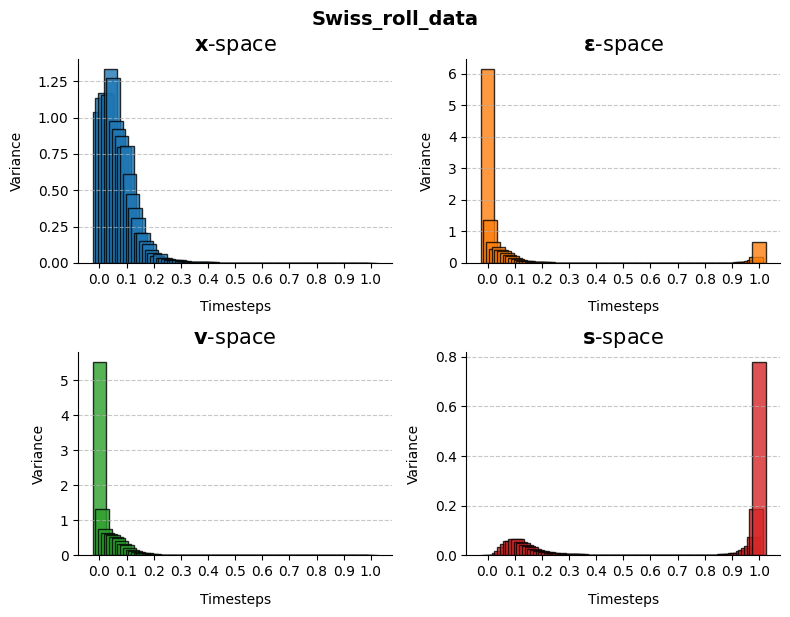

In [3]:
import matplotlib.pyplot as plt
import numpy as np
loss_formulations = [
    loss.diffusion_loss_x,
    loss.diffusion_loss_epsilon,
    loss.diffusion_loss_v,
    loss.diffusion_loss_score,
]

data_type = "Swiss_roll_data"
base_paths = [
    "saved_data/2Dim/ELBO/Execution_1",
    "saved_data/2Dim/ELBO/Execution_2",
    "saved_data/2Dim/ELBO/Execution_3",
]

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
losses = [r'$\mathbf{x}$-space', r'$\mathbf{\epsilon}$-space', r'$\mathbf{v}$-space', r'$\mathbf{s}$-space']
fig, axes = plt.subplots(2, 2, figsize=(8, 6))
axes = axes.flatten()

for idx, loss_formulation in enumerate(loss_formulations):
    combined_variances = {}

    for base_path in base_paths:
        path = f"{base_path}/{loss_formulation.__name__}_training_results"
        results = utils.load_data(path)
        lt_per_epoch = results[data_type]['loss_vs_time_per_epoch']
        
        master_dict = {}
        for di in lt_per_epoch:
            for key, value in di.items():
                master_dict.setdefault(key, []).append(value)
        
        for key, values in master_dict.items():
            variance = np.var(values)
            combined_variances.setdefault(key, []).append(variance)

    keys = list(combined_variances.keys())
    mean_variances = [np.mean(combined_variances[key]) for key in keys]
    timesteps = np.linspace(0, 1, len(keys))
    ax = axes[idx]
    ax.bar(
        timesteps, 
        mean_variances, 
        color=colors[idx], 
        edgecolor='black', 
        alpha=0.8, 
        width=0.05
    )
    ax.set_xlabel('Timesteps', fontsize=10, labelpad=10)
    ax.set_ylabel('Variance', fontsize=10, labelpad=10)
    ax.set_title(f"{losses[idx]}", fontsize=15)
    ax.set_xticks(np.linspace(0, 1, 11))  
    ax.set_xticklabels([f"{t:.1f}" for t in np.linspace(0, 1, 11)])
    ax.grid(axis='y', linestyle='--', alpha=0.7)  
    ax.spines['top'].set_visible(False)  
    ax.spines['right'].set_visible(False) 

plt.tight_layout()
fig.suptitle(f'{data_type}', fontsize=14, weight='bold', y=1.02)
plt.show()
